In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
df=pd.read_csv('job.csv')
df

,CGPA,INTERACTIVE,PRACTICAL KNOWLEDGE,SKILLS,JOB OFFEER
0,>=9,Yes,Very good,Good,Yes
1,>=8,No,Good,Moderate,Yes
2,>=9,No,Average,Poor,No
3,<8,No,Average,Good,No
4,>=8,Yes,Good,Moderate,Yes
5,>=9,Yes,Good,Moderate,Yes
6,<8,Yes,Good,Poor,No
7,>=9,No,Very good,Good,Yes
8,>=8,Yes,Good,Good,Yes
9,>=8,Yes,Average,Good,Yes


In [3]:
oe_cats=[['>=9','>=8','<8'],['Yes','No'],['Very good','Good','Average'],['Good','Moderate','Poor']]
oe_cols=['CGPA','INTERACTIVE','PRACTICAL KNOWLEDGE','SKILLS']
oe=OrdinalEncoder(categories=oe_cats)
df[oe_cols]=oe.fit_transform(df[oe_cols])
oe.categories

[['>=9', '>=8', '<8'],
 ['Yes', 'No'],
 ['Very good', 'Good', 'Average'],
 ['Good', 'Moderate', 'Poor']]

In [4]:
le=LabelEncoder()
df['JOB OFFEER']=le.fit_transform(df['JOB OFFEER'])
df

,CGPA,INTERACTIVE,PRACTICAL KNOWLEDGE,SKILLS,JOB OFFEER
0,0.0,0.0,0.0,0.0,1
1,1.0,1.0,1.0,1.0,1
2,0.0,1.0,2.0,2.0,0
3,2.0,1.0,2.0,0.0,0
4,1.0,0.0,1.0,1.0,1
5,0.0,0.0,1.0,1.0,1
6,2.0,0.0,1.0,2.0,0
7,0.0,1.0,0.0,0.0,1
8,1.0,0.0,1.0,0.0,1
9,1.0,0.0,2.0,0.0,1


In [5]:
x=df.iloc[:,:-1]
x

,CGPA,INTERACTIVE,PRACTICAL KNOWLEDGE,SKILLS
0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0
2,0.0,1.0,2.0,2.0
3,2.0,1.0,2.0,0.0
4,1.0,0.0,1.0,1.0
5,0.0,0.0,1.0,1.0
6,2.0,0.0,1.0,2.0
7,0.0,1.0,0.0,0.0
8,1.0,0.0,1.0,0.0
9,1.0,0.0,2.0,0.0


In [6]:
y=df.iloc[:,-1]
y

0    1
1    1
2    0
3    0
4    1
5    1
6    0
7    1
8    1
9    1
Name: JOB OFFEER, dtype: int32

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [9]:
train_pred=dtc.predict(x_train)
test_pred=dtc.predict(x_test)

Train set:


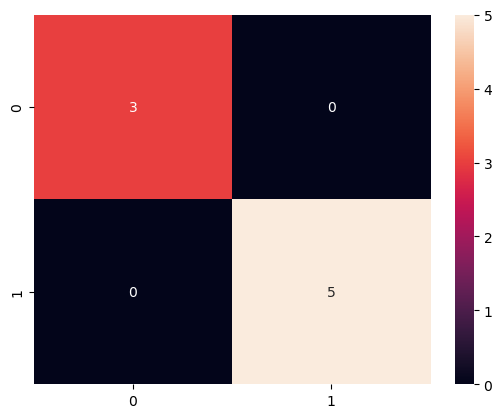

Test set:


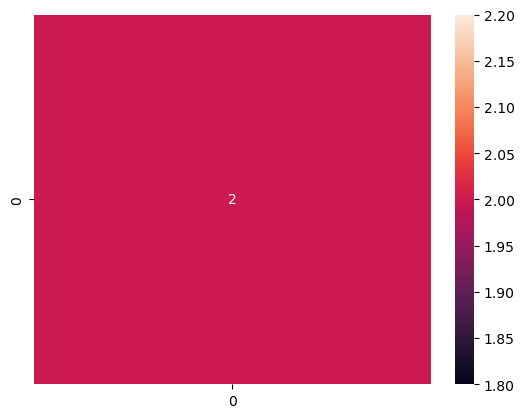

In [10]:
print('Train set:')
sns.heatmap(confusion_matrix(y_train,train_pred),annot=True)
plt.show()
print('Test set:')
sns.heatmap(confusion_matrix(y_test,test_pred),annot=True)
plt.show()

In [11]:
from sklearn import tree
with open('JOB.txt','w') as f:
    f=tree.export_graphviz(dtc,out_file=f)